# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

In [3]:
cities

['ushuaia',
 'hanceville',
 'alotau',
 'edinburgh of the seven seas',
 'lihue',
 'choyr',
 'grytviken',
 'nemuro',
 'papao',
 'kidal',
 'ngerengere',
 'iqaluit',
 'taiohae',
 'fredericton',
 'port-aux-francais',
 'antofagasta',
 'kenai',
 'bethel',
 'coyhaique',
 'puerto natales',
 'ribeira grande',
 'blackmans bay',
 'devoto',
 'adamstown',
 'port elizabeth',
 'port alfred',
 'vorgashor',
 'priozersk',
 'hermanus',
 'wailua homesteads',
 'san patricio',
 'jamestown',
 'faya-largeau',
 'yellowknife',
 'udachny',
 'arima',
 'iskateley',
 'kill devil hills',
 'amboanjo',
 'kawthoung',
 'gaspe',
 'albany',
 'kodiak',
 'at taj',
 'walvis bay',
 'hadibu',
 'guerrero negro',
 'ulanhot',
 'marka',
 'tocopilla',
 'shizilu',
 'tazovsky',
 'rongelap',
 'ilulissat',
 'avarua',
 'isafjordur',
 'la cruz',
 'enewetak',
 "'ohonua",
 'fort mcmurray',
 'i-n-salah',
 'invercargill',
 'west island',
 'constantia',
 'waitangi',
 'ust-nera',
 'bilibino',
 'asau village',
 'stanthorpe',
 'fort bragg',
 'tal

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
import time
import requests

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
        time.sleep(10)

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    #print(city_url)

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]  # Fixed the key to "lon"
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]  # Removed brackets around "main" and "humidity"
        city_clouds = city_weather["clouds"]["all"]  # Removed brackets around "clouds" and "all"
        city_wind = city_weather["wind"]["speed"]  # Removed brackets around "wind" and "speed"
        city_country = city_weather["sys"]["country"]  # Removed brackets around "sys" and "country"
        city_date = city_weather["dt"]  # Removed brackets around "dt"

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hanceville
Processing Record 3 of Set 1 | alotau
City not found. Skipping...
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | choyr
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | papao
Processing Record 10 of Set 1 | kidal
Processing Record 11 of Set 1 | ngerengere
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | fredericton
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | antofagasta
Processing Record 17 of Set 1 | kenai
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | coyhaique
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | ribeira grande
Processin

Processing Record 37 of Set 4 | lompoc
Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | canmore
Processing Record 40 of Set 4 | tangalle
Processing Record 41 of Set 4 | kiknur
Processing Record 42 of Set 4 | pasuquin
Processing Record 43 of Set 4 | dhanaura
Processing Record 44 of Set 4 | inhambane
Processing Record 45 of Set 4 | puerto gaitan
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | zhongshu
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | lerwick
Processing Record 0 of Set 5 | iron mountain
Processing Record 1 of Set 5 | vizinga
Processing Record 2 of Set 5 | yongchuan
Processing Record 3 of Set 5 | revda
Processing Record 4 of Set 5 | kralendijk
Processing Record 5 of Set 5 | pont rouge
Processing Record 6 of Set 5 | kuta
Processing Record 7 of Set 5 | port saint john's
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | port augusta
Processing Record 10 of Set 5 | conde
Processing Record

Processing Record 30 of Set 8 | quellon
Processing Record 31 of Set 8 | saint-pierre
Processing Record 32 of Set 8 | koraput
Processing Record 33 of Set 8 | la junta
Processing Record 34 of Set 8 | prairie grove
Processing Record 35 of Set 8 | great falls
Processing Record 36 of Set 8 | taloda
Processing Record 37 of Set 8 | magdagachi
Processing Record 38 of Set 8 | palora
Processing Record 39 of Set 8 | patterson
Processing Record 40 of Set 8 | montmagny
Processing Record 41 of Set 8 | al faw
Processing Record 42 of Set 8 | alpena
Processing Record 43 of Set 8 | clocolan
Processing Record 44 of Set 8 | qom
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | baoqing
Processing Record 47 of Set 8 | kalemie
Processing Record 48 of Set 8 | bikramganj
Processing Record 49 of Set 8 | tura
Processing Record 0 of Set 9 | tsetserleg
Processing Record 1 of Set 9 | jayapura
Processing Record 2 of Set 9 | xilin hot
Processing Record 3 of Set 9 | omamacho-omama
Processing Recor

Processing Record 20 of Set 12 | yaren
Processing Record 21 of Set 12 | yatou
Processing Record 22 of Set 12 | kilindoni
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | aoulef
Processing Record 25 of Set 12 | dzuunharaa
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | trinidad
Processing Record 28 of Set 12 | horta
Processing Record 29 of Set 12 | lalibela
Processing Record 30 of Set 12 | santana
Processing Record 31 of Set 12 | houghton
Processing Record 32 of Set 12 | lagos de moreno
Processing Record 33 of Set 12 | loen
Processing Record 34 of Set 12 | zapolyarnyy
Processing Record 35 of Set 12 | yulinshi
Processing Record 36 of Set 12 | santa cruz
Processing Record 37 of Set 12 | barranca
Processing Record 38 of Set 12 | moa
Processing Record 39 of Set 12 | dutse
Processing Record 40 of Set 12 | jutai
Processing Record 41 of Set 12 | mahibadhoo
Processing Record 42 of Set 12 | dourdan
Processing Record 43 of Set 12 | az zulfi
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,276.96,75,75,7.20,AR,1688924811
1,hanceville,34.0607,-86.7675,302.29,51,75,2.70,US,1688924811
2,edinburgh of the seven seas,-37.0676,-12.3116,288.38,84,100,9.94,SH,1688924811
3,lihue,21.9789,-159.3672,297.92,81,100,10.29,US,1688924811
4,choyr,46.3611,108.3611,292.87,53,74,2.29,MN,1688924811
5,grytviken,-54.2811,-36.5092,267.37,81,70,4.42,GS,1688924811
6,nemuro,43.3236,145.5750,287.96,100,89,3.76,JP,1688924812
7,papao,-17.7500,-149.5500,298.97,84,30,11.39,PF,1688924812
8,kidal,18.4411,1.4078,313.54,13,7,2.03,ML,1688924812
9,ngerengere,-6.7500,38.1167,296.51,70,82,1.89,TZ,1688924812


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,276.96,75,75,7.20,AR,1688924811
1,hanceville,34.0607,-86.7675,302.29,51,75,2.70,US,1688924811
2,edinburgh of the seven seas,-37.0676,-12.3116,288.38,84,100,9.94,SH,1688924811
3,lihue,21.9789,-159.3672,297.92,81,100,10.29,US,1688924811
4,choyr,46.3611,108.3611,292.87,53,74,2.29,MN,1688924811


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

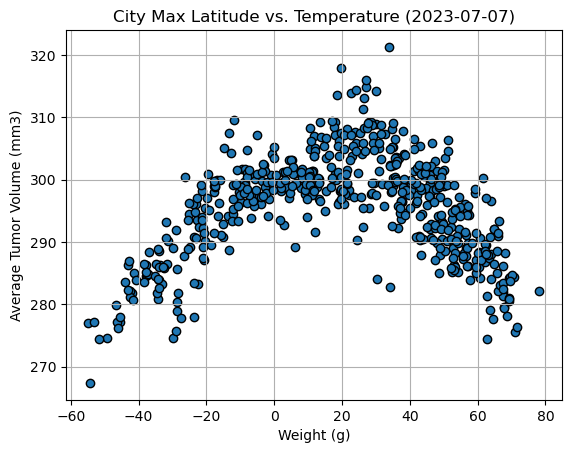

In [13]:
# Build scatter plot for latitude vs. temperature
latitude=city_data_df["Lat"]
temp=city_data_df["Max Temp"]

x_values=latitude
y_values=temp
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-07-07)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

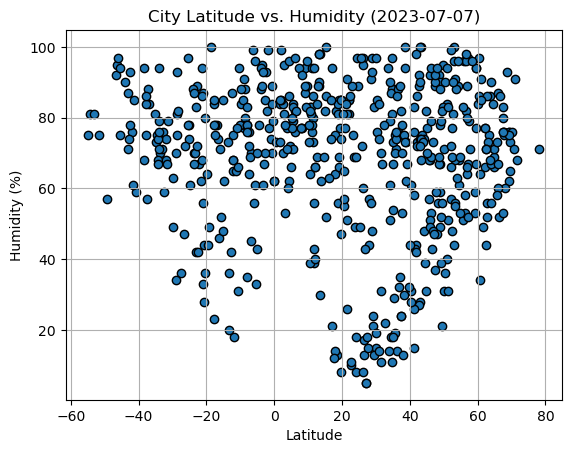

In [14]:
# Build the scatter plots for latitude vs. humidity
humidity=city_data_df["Humidity"]

x_values=latitude
y_values=humidity
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

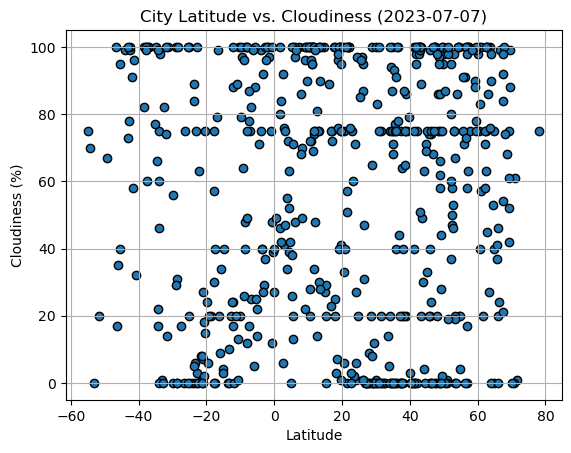

In [15]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness=city_data_df["Cloudiness"]

x_values=latitude
y_values=cloudiness
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

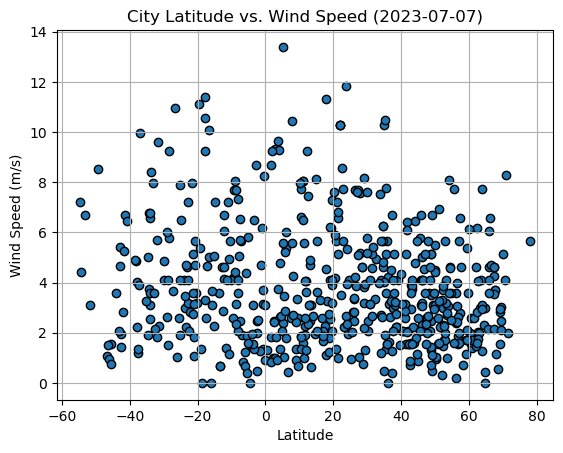

In [16]:
# Build the scatter plots for latitude vs. wind speed
wind=city_data_df["Wind Speed"]

x_values=latitude
y_values=wind
plt.scatter(x_values, y_values, edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hanceville,34.0607,-86.7675,302.29,51,75,2.70,US,1688924811
3,lihue,21.9789,-159.3672,297.92,81,100,10.29,US,1688924811
4,choyr,46.3611,108.3611,292.87,53,74,2.29,MN,1688924811
6,nemuro,43.3236,145.5750,287.96,100,89,3.76,JP,1688924812
8,kidal,18.4411,1.4078,313.54,13,7,2.03,ML,1688924812


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,276.96,75,75,7.20,AR,1688924811
2,edinburgh of the seven seas,-37.0676,-12.3116,288.38,84,100,9.94,SH,1688924811
5,grytviken,-54.2811,-36.5092,267.37,81,70,4.42,GS,1688924811
7,papao,-17.7500,-149.5500,298.97,84,30,11.39,PF,1688924812
9,ngerengere,-6.7500,38.1167,296.51,70,82,1.89,TZ,1688924812


###  Temperature vs. Latitude Linear Regression Plot

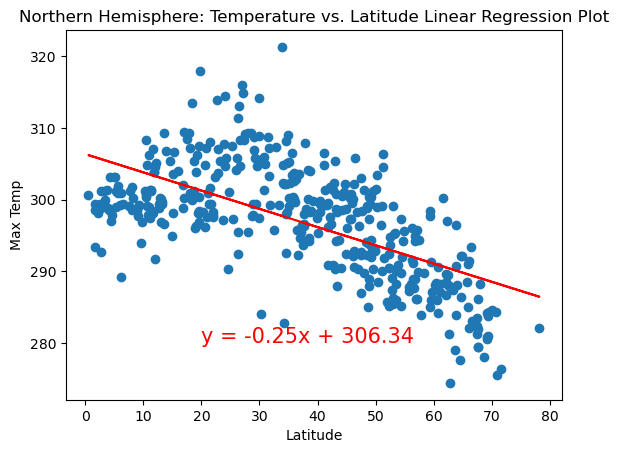

y = -0.25x + 306.34


In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 280), fontsize=15, color="red")

plt.title('Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

print(line_eq)

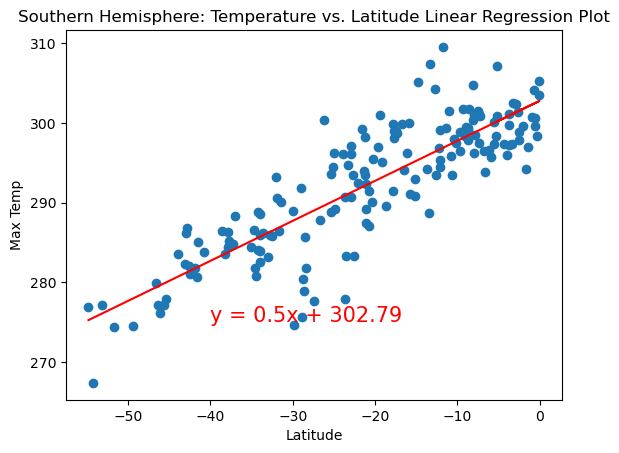

y = 0.5x + 302.79


In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 275), fontsize=15, color="red")

plt.title('Southern Hemisphere: Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** As latitude increases (as a city increases in distance from the equator), max temperatures decrease. This pattern holds in the Southern Hemisphere, as a city’s distance from the equator increases, the maximum temperature decreases. This implies that there is a negative relationship between the absolute value of latitude (distance from the equator) and max temperature. 

### Humidity vs. Latitude Linear Regression Plot

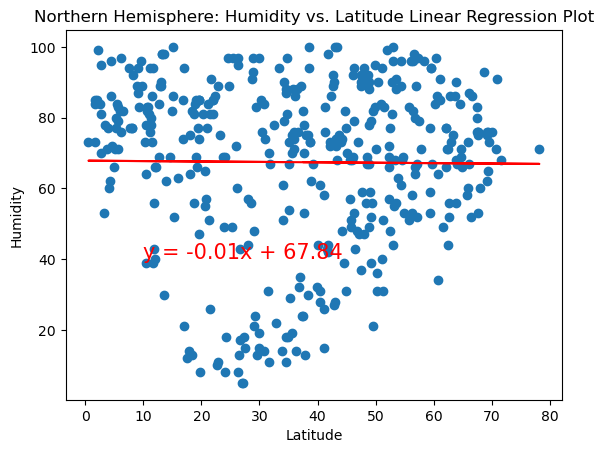

y = -0.01x + 67.84


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")

plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

print(line_eq)

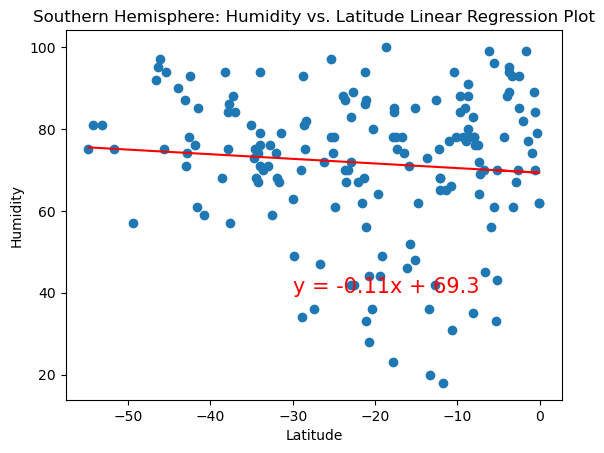

y = -0.11x + 69.3


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")

plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** There is a slightly negative relationship between latitude and humidity. As the distance from the equator increases, the humidity decreases. However, the slope of both regression lines is quite far from 1, and the line is not very steep. 

### Cloudiness vs. Latitude Linear Regression Plot

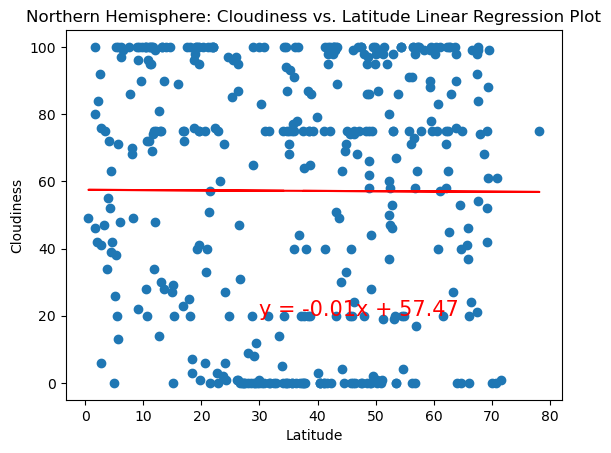

y = -0.01x + 57.47


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30, 20), fontsize=15, color="red")

plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

print(line_eq)

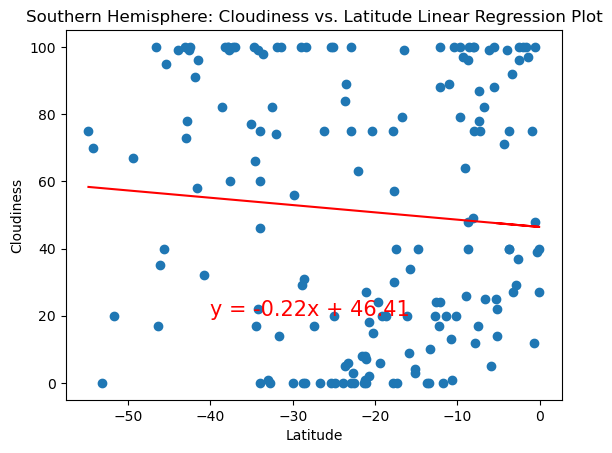

y = -0.22x + 46.41


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 20), fontsize=15, color="red")

plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** There is a negative relationship between the absolute value of latitude (distance from the equator) and cloudiness. As a city’s distance from the equator increases, the cloudiness reduces. This pattern applies in both the northern and southern hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

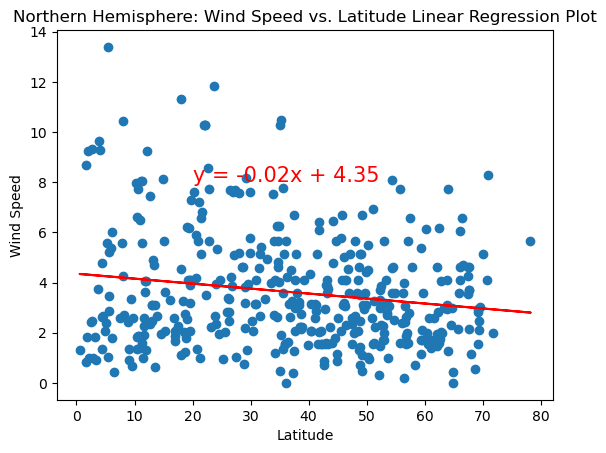

y = -0.02x + 4.35


In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20, 8), fontsize=15, color="red")

plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

print(line_eq)

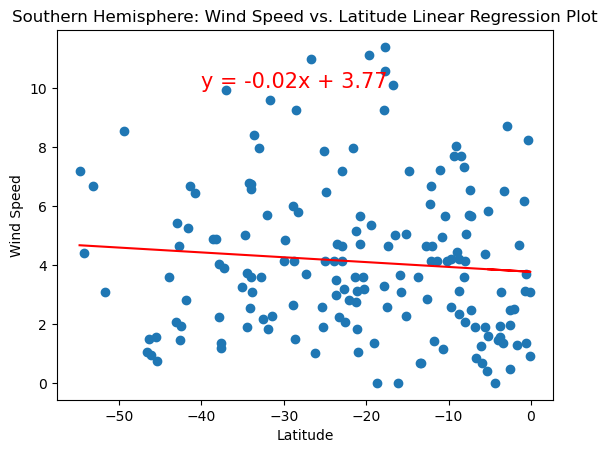

y = -0.02x + 3.77


In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data points and regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40, 10), fontsize=15, color="red")

plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

print(line_eq)

**Discussion about the linear relationship:** The relationship between wind speed and latitude seems different in the Northern and Southern Hemispheres. In the Northern Hemisphere, as distance from the equator increases, wind speed decreases. In the Southern Hemisphere, as distance from the equator increases, wind speed increases. 